In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

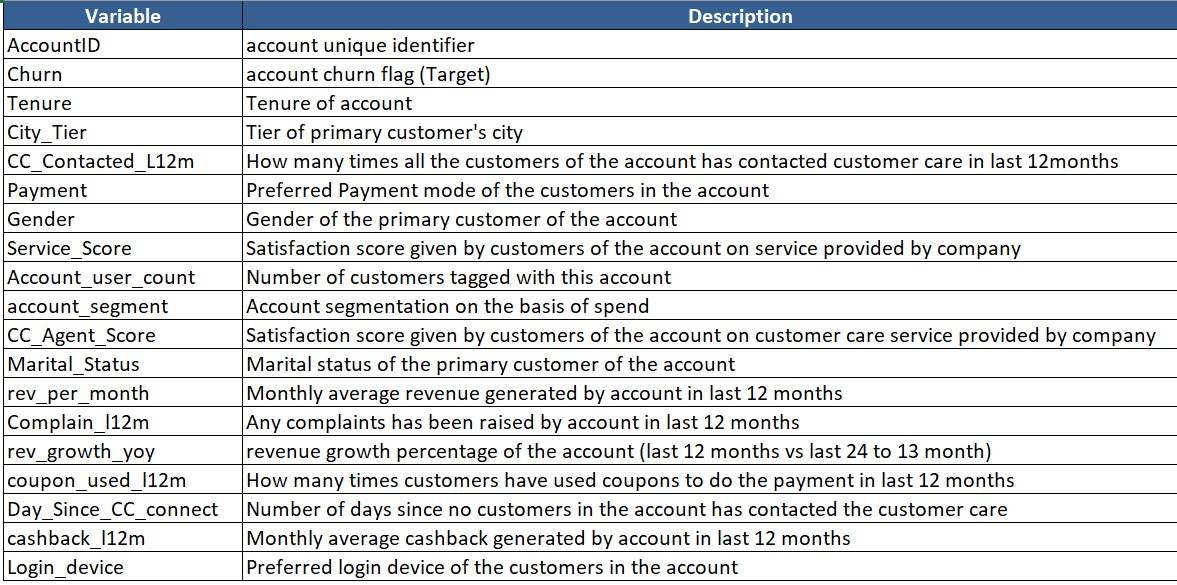

In [2]:
from PIL import Image, ImageDraw, ImageFilter
im1 = Image.open('img.jpg')
im1

In [3]:
df = pd.read_excel("Customer Churn Data.xlsx",sheet_name='Data for DSBA') 

In [4]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
df.shape

(11260, 19)

In [6]:
df.size

213940

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [9]:
df['Churn'].value_counts(1)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [10]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [11]:
Null=df.isnull().sum()/df.isnull().sum().sum()*100
Null.sort_values(ascending=False) 

cashback                   17.600897
Day_Since_CC_connect       13.340807
Complain_ly                13.340807
Login_device                8.258595
Marital_Status              7.922272
CC_Agent_Score              4.334828
City_Tier                   4.185351
Account_user_count          4.185351
Payment                     4.073244
Gender                      4.035874
CC_Contacted_LY             3.811659
Tenure                      3.811659
rev_per_month               3.811659
Service_Score               3.662182
account_segment             3.624813
rev_growth_yoy              0.000000
coupon_used_for_payment     0.000000
Churn                       0.000000
AccountID                   0.000000
dtype: float64

<AxesSubplot:>

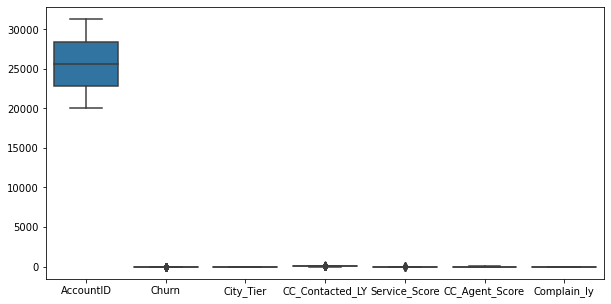

In [12]:
plt.figure(figsize=(10,5)) 
sns.boxplot(data=df) 

In [13]:
dups = df.duplicated()
dups.sum()

0

There are no duplicate values in the dataset

In [14]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

I am removing the service score of 5 and 0 since they have very less records in them and the values in 5 rating are added to 4 and the values in 0 are moved to 1. 

In [15]:
df['Service_Score'].replace([5],[4],inplace=True) 

In [16]:
df['Service_Score'].replace([0],[1],inplace=True) 

In [17]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2336
1.0      85
Name: Service_Score, dtype: int64

In [18]:
#Finding different values in each categorical object. We can see that few numerical variables are showing as categorical 
#this means there are some unwanted characters in this variable.
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64


Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64


account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +        

In [19]:
for feature in df.columns: 
    if df[feature].dtype == 'float': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64


CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
4.0        1
129.0      1
132.0      1
127.0      1
126.0      1
Name: CC_Contacted_LY, dtype: int64


Service_Score
3.0    5490
2.0    3251
4.0    2336
1.0      85
Name: Service_Score, dtype: int64


CC_Agent_Score
3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64


Complain_ly
0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64




In [20]:
df['Gender'].replace(['M'],['Male'],inplace=True) 
df['Gender'].replace(['F'],['Female'],inplace=True)

We are replacing the M and F into already existing Male and Female class.

In [21]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [22]:
df['account_segment'].replace(['Regular +'],['Regular Plus'],inplace=True) 
df['account_segment'].replace(['Super +'],['Super Plus'],inplace=True) 

In [23]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [24]:
df.select_dtypes(include='object').head()

,Tenure,Payment,Gender,Account_user_count,account_segment,Marital_Status,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4,Debit Card,Female,3,Super,Single,9,11,1,5,159.93,Mobile
1,0,UPI,Male,4,Regular Plus,Single,7,15,0,0,120.9,Mobile
2,0,Debit Card,Male,4,Regular Plus,Single,6,14,0,3,NaN,Mobile
3,0,Debit Card,Male,4,Super,Single,8,23,0,3,134.07,Mobile
4,0,Credit Card,Male,3,Regular Plus,Single,3,11,1,3,129.6,Mobile


In [25]:
## Here are are replacing all the unwanted characters in the numerical varaiables as null. All the below mentioned variable had few
# unwanted variables such as $ # @ & ? these all are made as null values.
df['Tenure'] = pd.to_numeric(df['Tenure'],errors='coerce') 
df['Account_user_count'] = pd.to_numeric(df['Account_user_count'],errors='coerce') 
df['rev_per_month'] = pd.to_numeric(df['rev_per_month'],errors='coerce') 
df['rev_growth_yoy'] = pd.to_numeric(df['rev_growth_yoy'],errors='coerce') 
df['coupon_used_for_payment'] = pd.to_numeric(df['coupon_used_for_payment'],errors='coerce') 
df['Day_Since_CC_connect'] = pd.to_numeric(df['Day_Since_CC_connect'],errors='coerce') 
df['cashback'] = pd.to_numeric(df['cashback'],errors='coerce') 

In [26]:
df['Login_device'].replace('&&&&',np.nan,inplace=True)  

In [27]:
df.select_dtypes(include='object').head()

,Payment,Gender,account_segment,Marital_Status,Login_device
0,Debit Card,Female,Super,Single,Mobile
1,UPI,Male,Regular Plus,Single,Mobile
2,Debit Card,Male,Regular Plus,Single,Mobile
3,Debit Card,Male,Super,Single,Mobile
4,Credit Card,Male,Regular Plus,Single,Mobile


Now we can see that the object table only columns that are objects

In [28]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [29]:
Null=df.isnull().sum()/df.isnull().sum().sum()*100
Null.sort_values(ascending=False) 

rev_per_month              18.138042
Login_device               17.427196
cashback                   10.846136
Account_user_count         10.181151
Day_Since_CC_connect        8.209126
Complain_ly                 8.186196
Tenure                      4.998853
Marital_Status              4.861270
CC_Agent_Score              2.659940
City_Tier                   2.568218
Payment                     2.499427
Gender                      2.476496
CC_Contacted_LY             2.338913
Service_Score               2.247191
account_segment             2.224260
rev_growth_yoy              0.068792
coupon_used_for_payment     0.068792
Churn                       0.000000
AccountID                   0.000000
dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

Compared to earlier most of the variable are converted to their actual data type. Earlier cash back, days since CC, Tenure all were in object data type now they are in float. 

In [31]:
cat_col=df.select_dtypes(include=['object','category']).columns.tolist()
num_col=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [32]:
cat_col

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

In [33]:
num_col

['AccountID',
 'Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

# Null treatment

In [34]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df[num_col].iloc[:,:])
df[num_col]=imputer.transform(df[num_col])

In [35]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(df[cat_col].iloc[:,:])
df[cat_col]=imputer.transform(df[cat_col])

In [36]:
df[cat_col]

,Payment,Gender,account_segment,Marital_Status,Login_device
0,Debit Card,Female,Super,Single,Mobile
1,UPI,Male,Regular Plus,Single,Mobile
2,Debit Card,Male,Regular Plus,Single,Mobile
3,Debit Card,Male,Super,Single,Mobile
4,Credit Card,Male,Regular Plus,Single,Mobile
...,...,...,...,...,...
11255,Credit Card,Male,Super,Married,Computer
11256,Credit Card,Male,HNI,Married,Mobile
11257,Debit Card,Male,Super,Married,Mobile
11258,Credit Card,Male,Super,Married,Computer


<AxesSubplot:xlabel='Payment', ylabel='Complain_ly'>

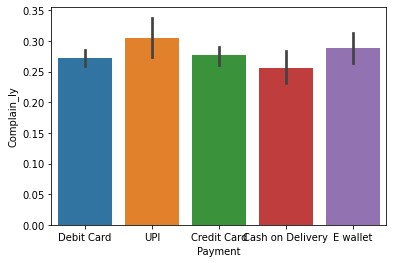

In [37]:
sns.barplot(df['Payment'],df['Complain_ly'])

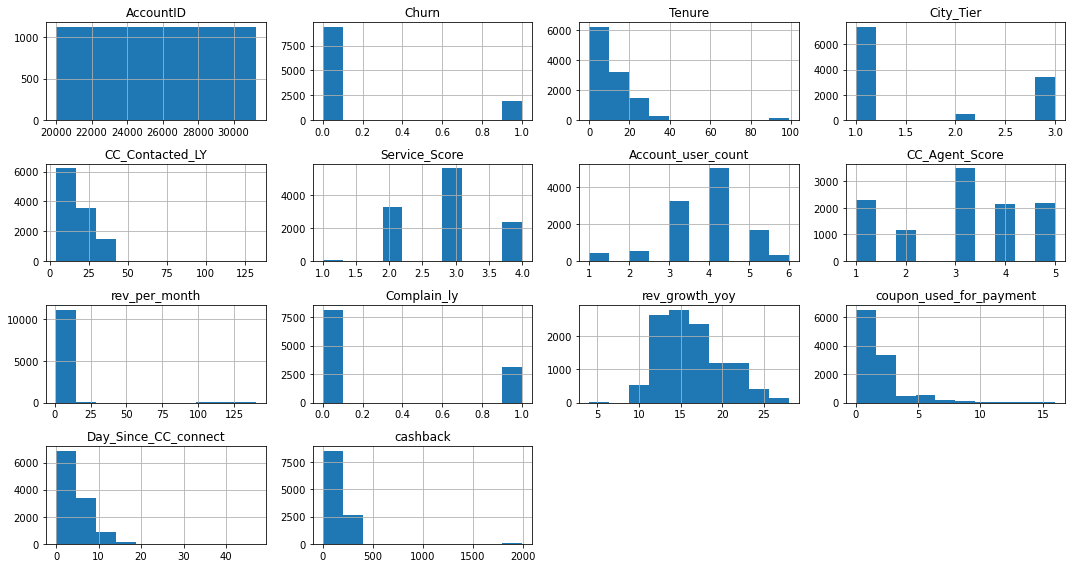

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.hist()
plt.tight_layout();

<AxesSubplot:xlabel='Payment', ylabel='count'>

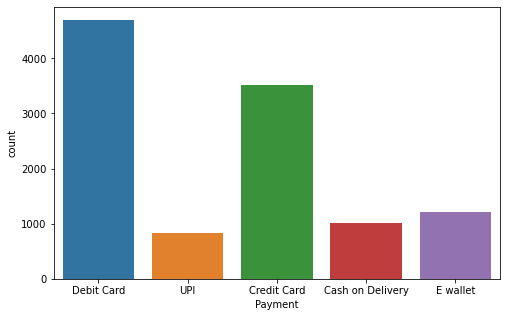

In [39]:
rcParams['figure.figsize'] = 8,5
sns.countplot(df['Payment']) 

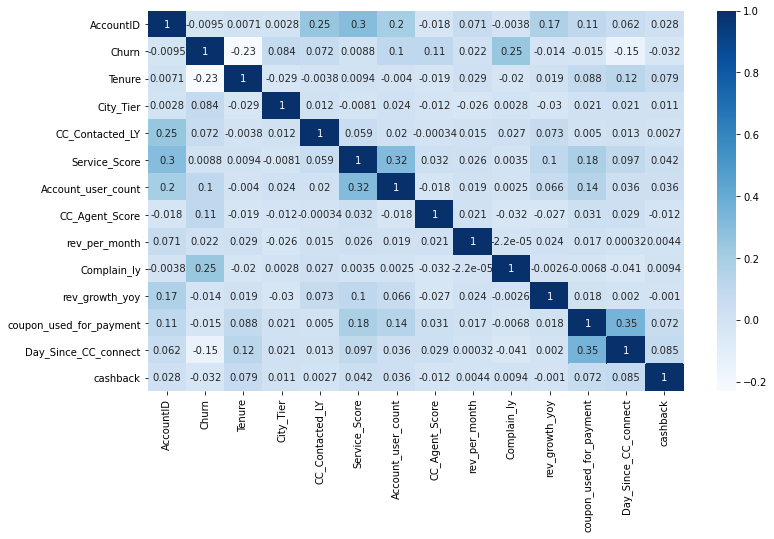

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

In [41]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

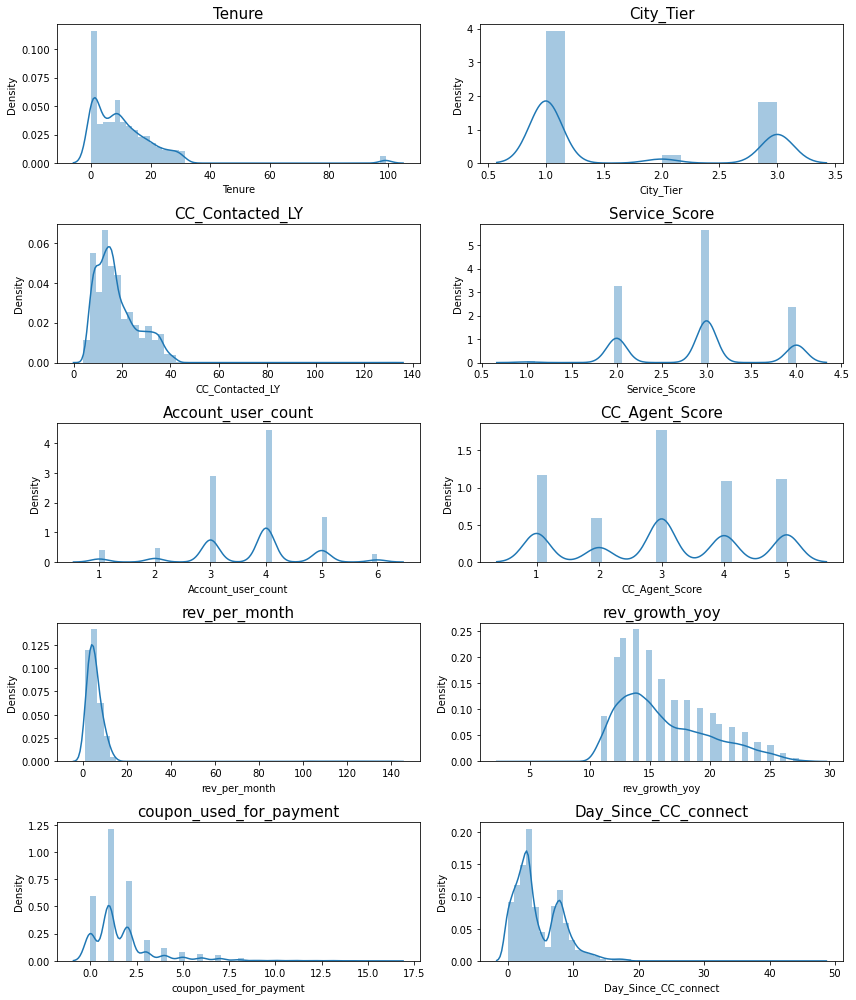

In [42]:
## Univariate except Name column
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df['Tenure'] , ax=axes[0][0])
a.set_title("Tenure",fontsize=15)

a = sns.distplot(df['City_Tier'] , ax=axes[0][1])
a.set_title("City_Tier",fontsize=15)

a = sns.distplot(df['CC_Contacted_LY'] , ax=axes[1][0])
a.set_title("CC_Contacted_LY",fontsize=15)


a = sns.distplot(df['Service_Score'] , ax=axes[1][1])
a.set_title("Service_Score",fontsize=15)


a = sns.distplot(df['Account_user_count'] , ax=axes[2][0])
a.set_title("Account_user_count",fontsize=15)


a = sns.distplot(df['CC_Agent_Score'] , ax=axes[2][1])
a.set_title("CC_Agent_Score",fontsize=15)

a = sns.distplot(df['rev_per_month'] , ax=axes[3][0])
a.set_title("rev_per_month",fontsize=15)

a = sns.distplot(df['rev_growth_yoy'] , ax=axes[3][1])
a.set_title("rev_growth_yoy",fontsize=15)

a = sns.distplot(df['coupon_used_for_payment'] , ax=axes[4][0])
a.set_title("coupon_used_for_payment",fontsize=15)

a = sns.distplot(df['Day_Since_CC_connect'] , ax=axes[4][1])
a.set_title("Day_Since_CC_connect",fontsize=15)


plt.tight_layout()
plt.show()

## Finding the outliers for numerical variables

Shape After Outliers Treatment (11260, 19)


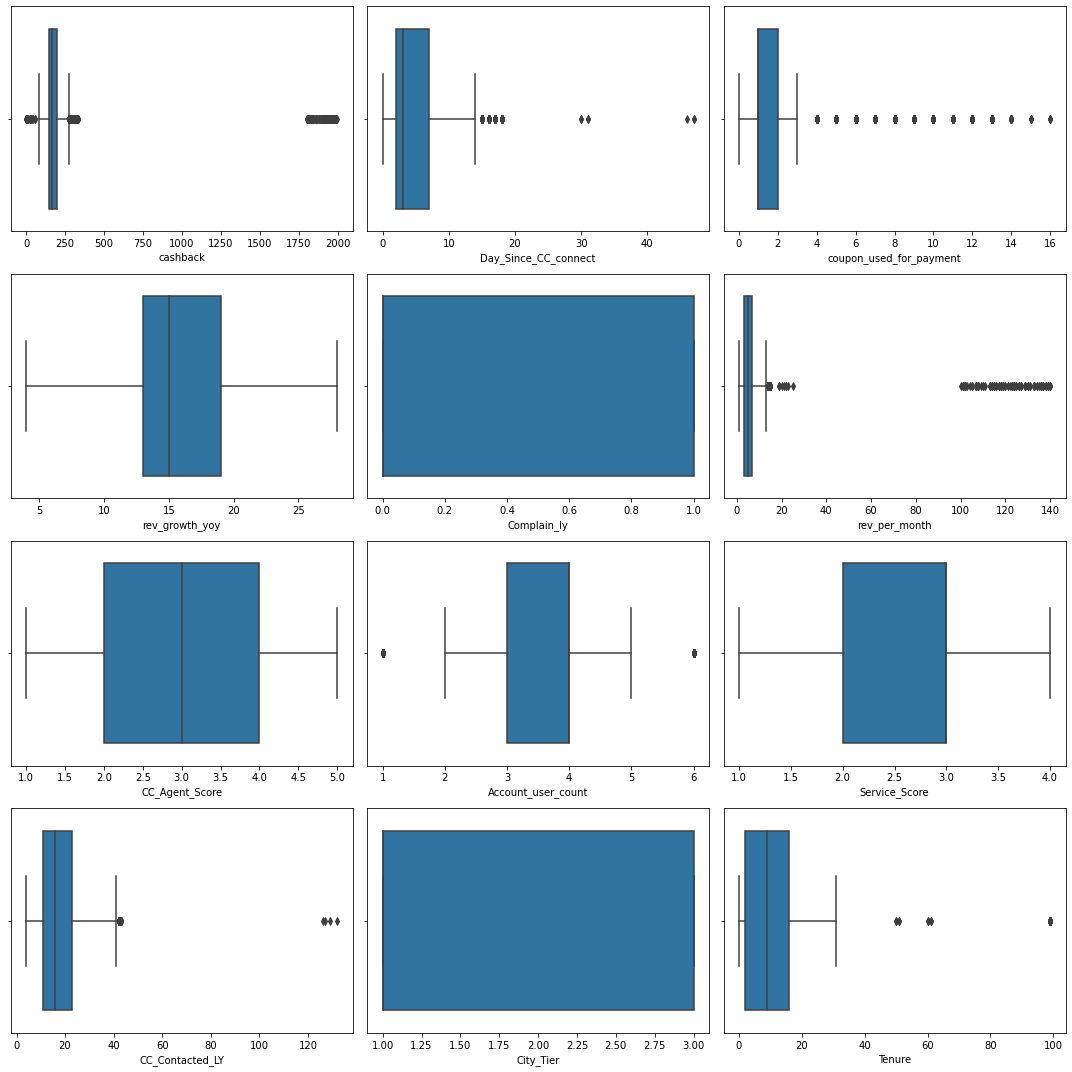

In [43]:
data_plot=df[['cashback','Day_Since_CC_connect', 'coupon_used_for_payment', 'rev_growth_yoy','Complain_ly','rev_per_month',
             'CC_Agent_Score','Account_user_count','Service_Score','CC_Contacted_LY','City_Tier','Tenure']]
fig=plt.figure(figsize=(15,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',df.shape)

## Outlier treatment 

In [44]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
lr,ur=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>ur,ur,df['cashback'])
df['cashback']=np.where(df['cashback']<lr,lr,df['cashback'])

lr,ur=remove_outlier(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']>ur,ur,df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']<lr,lr,df['Day_Since_CC_connect'])

lr,ur=remove_outlier(df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']>ur,ur,df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']<lr,lr,df['rev_per_month'])

lr,ur=remove_outlier(df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']>ur,ur,df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']<lr,lr,df['CC_Contacted_LY'])

lr,ur=remove_outlier(df['Tenure'])
df['Tenure']=np.where(df['Tenure']>ur,ur,df['Tenure'])
df['Tenure']=np.where(df['Tenure']<lr,lr,df['Tenure'])

df.shape

(11260, 19)

## Checking after outlier treatment

Shape After Outliers Treatment (11260, 19)


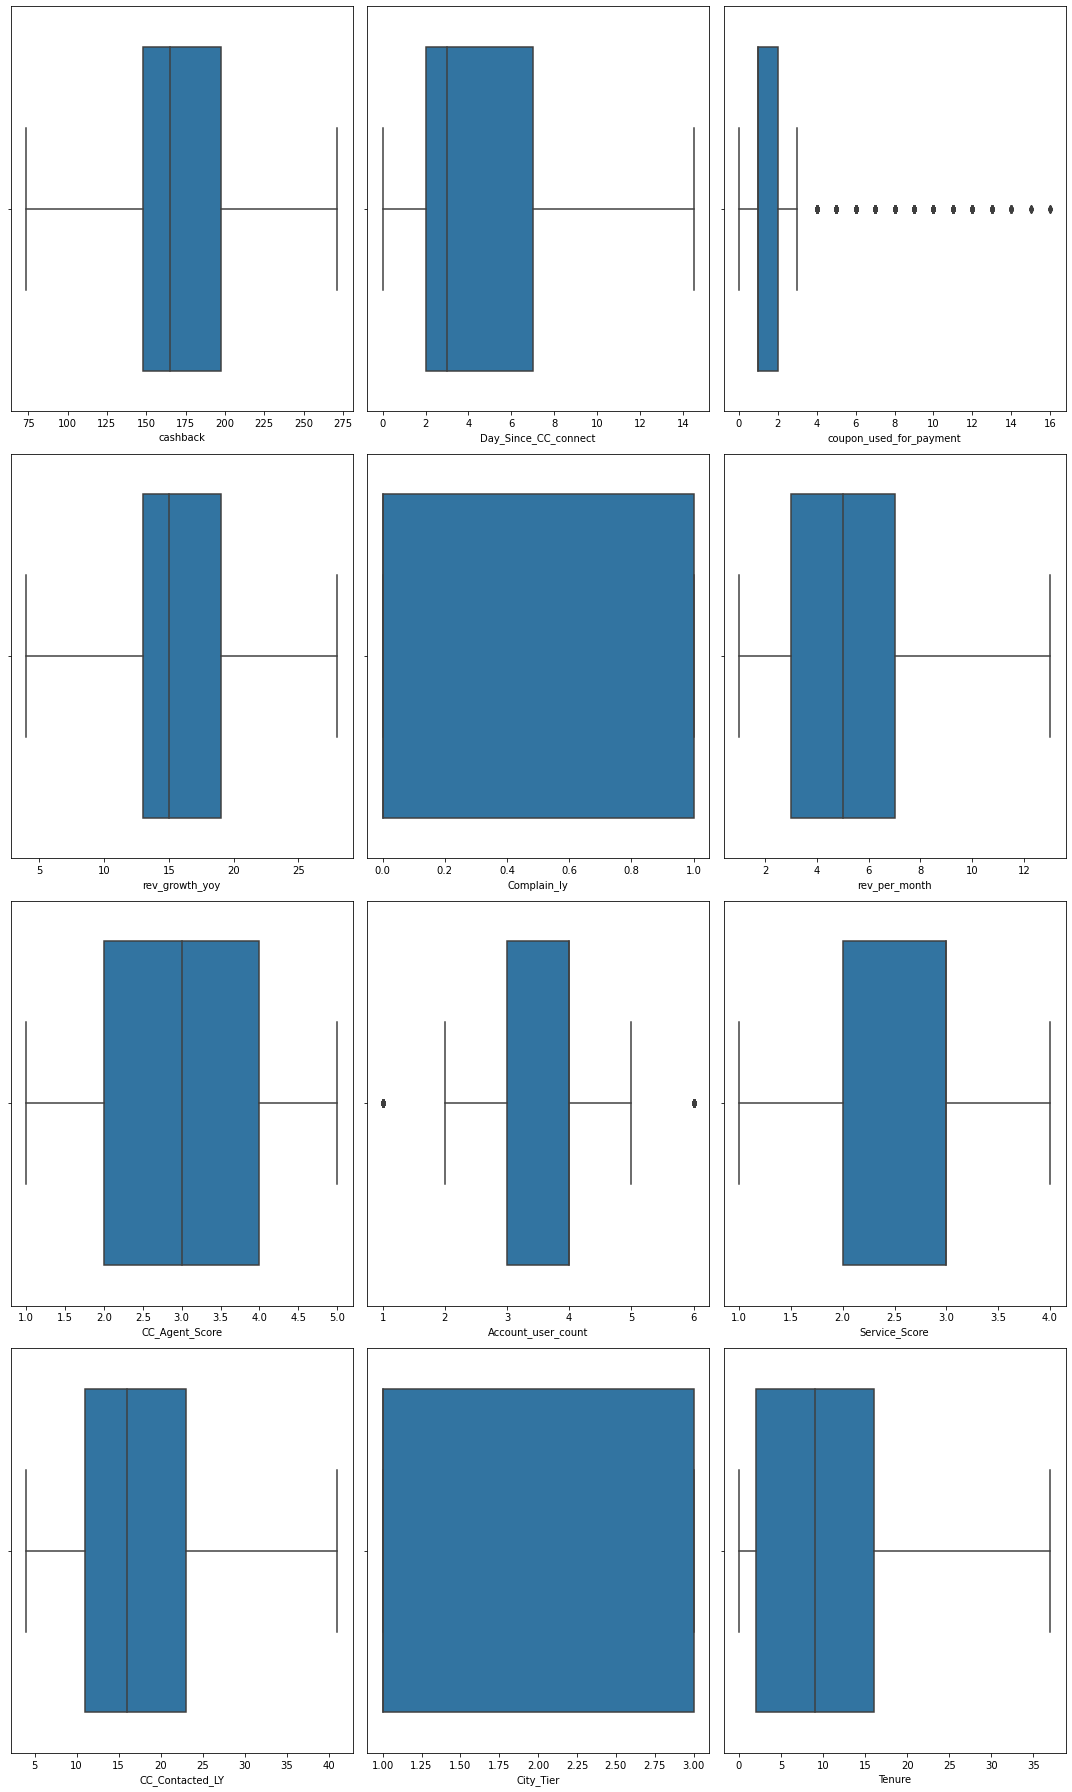

In [46]:
data_plot=df[['cashback','Day_Since_CC_connect', 'coupon_used_for_payment', 'rev_growth_yoy','Complain_ly','rev_per_month',
             'CC_Agent_Score','Account_user_count','Service_Score','CC_Contacted_LY','City_Tier','Tenure']]
fig=plt.figure(figsize=(15,25))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

print('Shape After Outliers Treatment',df.shape)

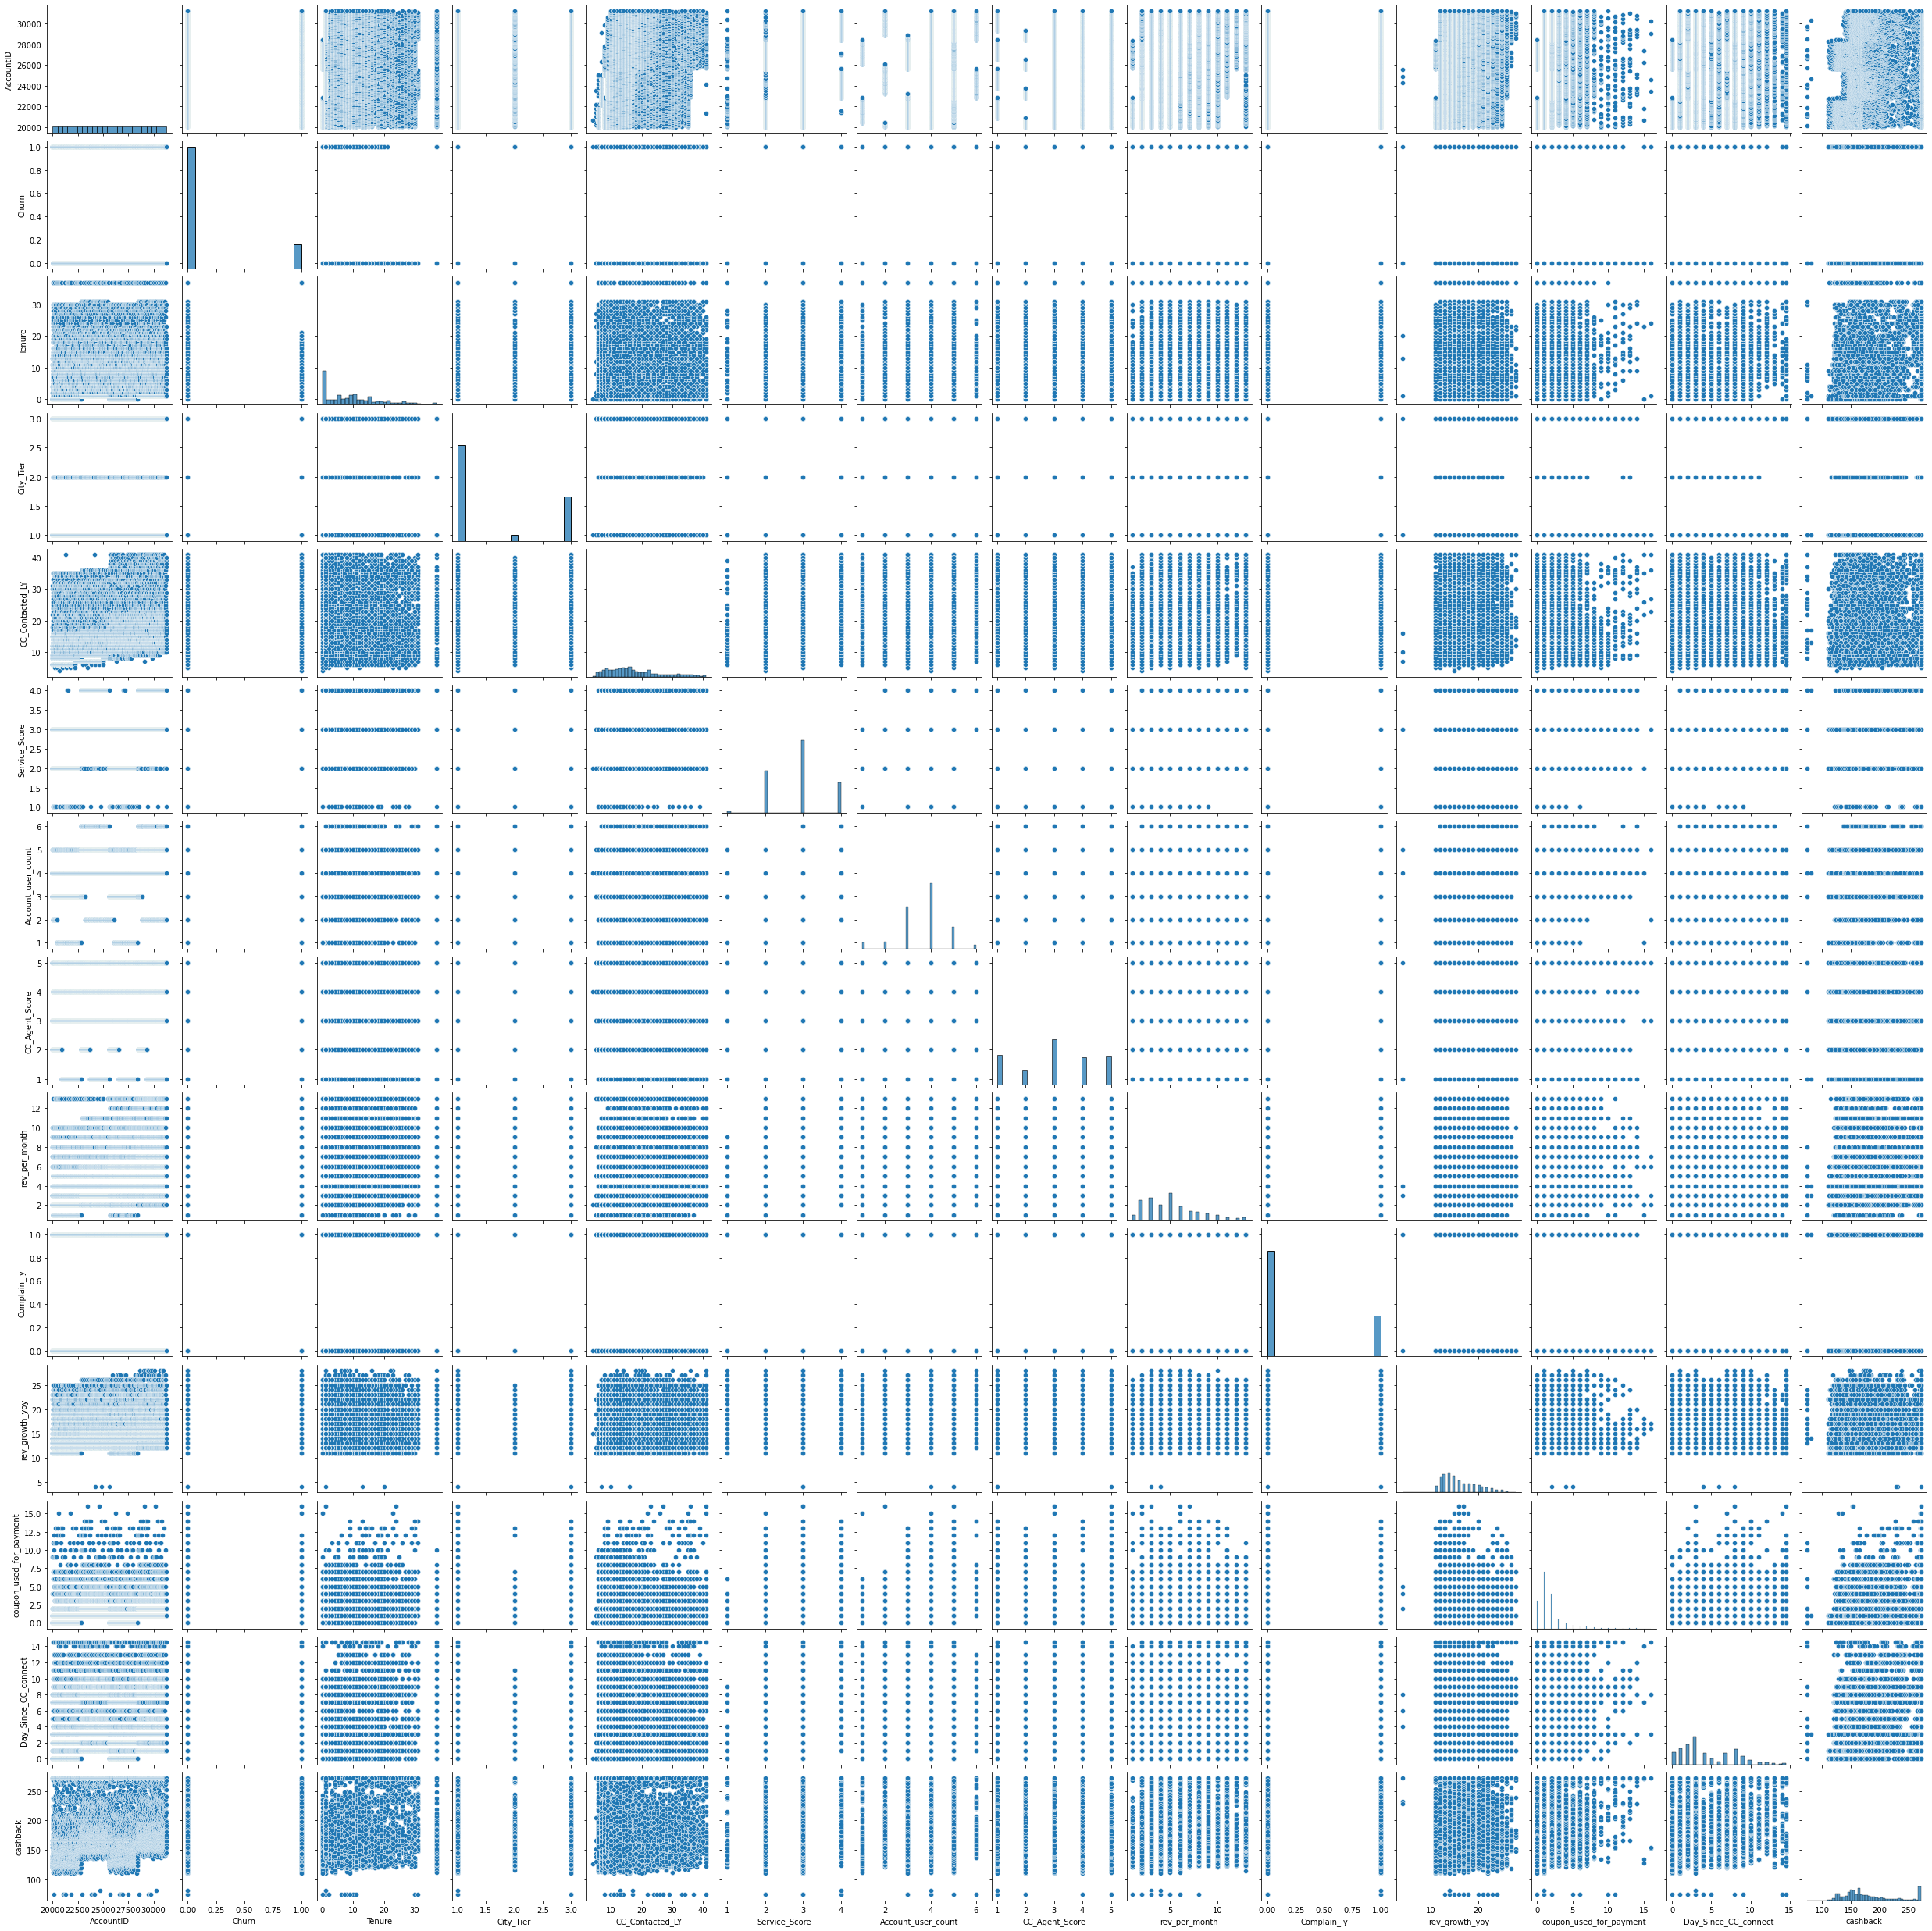

In [47]:
sns.pairplot(df)

In [48]:
## df.to_excel('Cleaned.xlsx')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  float64
 1   Churn                    11260 non-null  float64
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [50]:
df = pd.get_dummies(df,columns=['Payment','Gender','Marital_Status','account_segment','Login_device'],drop_first=True) 

In [51]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Payment_E wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Mobile
0,20000.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,20001.0,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0,1,1,0,1,0,1,0,0,1
2,20002.0,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,0,1,0,1,0,1,0,0,1
3,20003.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,1,0,0,1,0,1
4,20004.0,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,0,1,0,1,0,1,0,0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AccountID                     11260 non-null  float64
 1   Churn                         11260 non-null  float64
 2   Tenure                        11260 non-null  float64
 3   City_Tier                     11260 non-null  float64
 4   CC_Contacted_LY               11260 non-null  float64
 5   Service_Score                 11260 non-null  float64
 6   Account_user_count            11260 non-null  float64
 7   CC_Agent_Score                11260 non-null  float64
 8   rev_per_month                 11260 non-null  float64
 9   Complain_ly                   11260 non-null  float64
 10  rev_growth_yoy                11260 non-null  float64
 11  coupon_used_for_payment       11260 non-null  float64
 12  Day_Since_CC_connect          11260 non-null  float64
 13  c

In [53]:
df['Account_user_count'] = df['Account_user_count'].astype('str')
df['City_Tier'] = df['City_Tier'].astype('str')
df['Service_Score'] = df['Service_Score'].astype('str')
df['Complain_ly'] = df['Complain_ly'].astype('str')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AccountID                     11260 non-null  float64
 1   Churn                         11260 non-null  float64
 2   Tenure                        11260 non-null  float64
 3   City_Tier                     11260 non-null  object 
 4   CC_Contacted_LY               11260 non-null  float64
 5   Service_Score                 11260 non-null  object 
 6   Account_user_count            11260 non-null  object 
 7   CC_Agent_Score                11260 non-null  float64
 8   rev_per_month                 11260 non-null  float64
 9   Complain_ly                   11260 non-null  object 
 10  rev_growth_yoy                11260 non-null  float64
 11  coupon_used_for_payment       11260 non-null  float64
 12  Day_Since_CC_connect          11260 non-null  float64
 13  c

In [55]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: City_Tier
['3.0', '1.0', '2.0']
Categories (3, object): ['1.0', '2.0', '3.0']
[2 0 1]


feature: Service_Score
['3.0', '2.0', '1.0', '4.0']
Categories (4, object): ['1.0', '2.0', '3.0', '4.0']
[2 1 0 3]


feature: Account_user_count
['3.0', '4.0', '5.0', '2.0', '1.0', '6.0']
Categories (6, object): ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0']
[2 3 4 1 0 5]


feature: Complain_ly
['1.0', '0.0']
Categories (2, object): ['0.0', '1.0']
[1 0]


## Tain test split 

In [56]:
X = df.drop(['Churn','AccountID'], axis=1)
y = df[['Churn']] 

In [57]:
print('Train_data',X.shape)
print('Test_Data',y.shape)

Train_data (11260, 24)
Test_Data (11260, 1)


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [60]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)


X train shape (7882, 24)
X test shape (3378, 24)
y train shape (7882, 1)
y test shape (3378, 1)


In [61]:
X_train_columns = pd.DataFrame(X,columns=df.columns[2:26])  

## Decison tree

In [62]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
from sklearn import metrics
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 1326]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [64]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9393132030787448
[[2706  102]
 [ 103  467]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2808
         1.0       0.82      0.82      0.82       570

    accuracy                           0.94      3378
   macro avg       0.89      0.89      0.89      3378
weighted avg       0.94      0.94      0.94      3378



In [65]:
from sklearn.metrics import accuracy_score

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [69]:
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 1326]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [70]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9692125518058022
[[2800    8]
 [  96  474]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2808
         1.0       0.98      0.83      0.90       570

    accuracy                           0.97      3378
   macro avg       0.98      0.91      0.94      3378
weighted avg       0.97      0.97      0.97      3378



## Neural Network

In [68]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(random_state=1,tol=0.01) 

In [69]:
clf.fit(X_train,y_train)

MLPClassifier(random_state=1, tol=0.01)

In [70]:
y_pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
y_train_predict = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9194366911951282
[[6404  152]
 [ 483  843]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6556
         1.0       0.85      0.64      0.73      1326

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.91      7882



In [73]:
y_test_predict = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9082297217288336
[[2740   68]
 [ 242  328]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2808
         1.0       0.83      0.58      0.68       570

    accuracy                           0.91      3378
   macro avg       0.87      0.78      0.81      3378
weighted avg       0.90      0.91      0.90      3378



## LOGISTIC REGRESSION 

In [74]:
from sklearn.linear_model import LogisticRegression
model_logis = LogisticRegression()
model_logis.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_train_predict = model_logis.predict(X_train)
model_score = model_logis.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8927937071809185
[[6360  196]
 [ 649  677]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6556
         1.0       0.78      0.51      0.62      1326

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.89      0.89      0.88      7882



In [76]:
y_test_predict = model_logis.predict(X_test)
model_score = model_logis.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8863232682060391
[[2721   87]
 [ 297  273]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.76      0.48      0.59       570

    accuracy                           0.89      3378
   macro avg       0.83      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



## LDA 

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train,y_train)

In [78]:
y_train_predict = LDA.predict(X_train)
model_score = LDA.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.887338239025628
[[6361  195]
 [ 693  633]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6556
         1.0       0.76      0.48      0.59      1326

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



In [79]:
y_test_predict = LDA.predict(X_test)
model_score = LDA.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.881586737714624
[[2721   87]
 [ 313  257]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.75      0.45      0.56       570

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378



## Bagging

In [80]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [81]:
y_train_predict = bgcl.predict(X_train)
model_score = bgcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9963207307789901
[[6556    0]
 [  29 1297]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      0.99      7882
weighted avg       1.00      1.00      1.00      7882



In [82]:
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9570751924215513
[[2799    9]
 [ 136  434]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2808
         1.0       0.98      0.76      0.86       570

    accuracy                           0.96      3378
   macro avg       0.97      0.88      0.92      3378
weighted avg       0.96      0.96      0.95      3378



In [83]:
df1 = df.copy()

## TUNING EACH MODEL FOR BETTER ACCURACY

## LDA

In [84]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [85]:
param_grid = {
    'shrinkage': ['auto'] ,
    'solver': ['svd', 'lsqr', 'eigen'],
     
}

clf = LinearDiscriminantAnalysis() 

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto'],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [87]:
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [88]:
best_grid = grid_search.best_estimator_

In [89]:
best_grid

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

0.8865770109109363
[[6361  195]
 [ 699  627]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6556
         1.0       0.76      0.47      0.58      1326

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



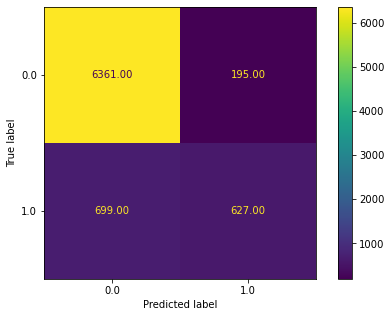

In [90]:
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.8821788040260509
[[2724   84]
 [ 314  256]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.75      0.45      0.56       570

    accuracy                           0.88      3378
   macro avg       0.82      0.71      0.75      3378
weighted avg       0.87      0.88      0.87      3378



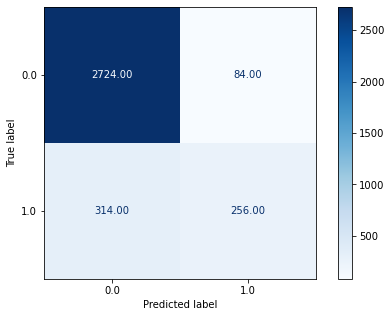

In [91]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f',cmap=plt.cm.Blues);  

In [92]:
LDA_train_acc = best_grid.score(X_train,y_train)
LDA_train_acc

0.8865770109109363

In [93]:
LDA_test_acc = best_grid.score(X_test,y_test)
LDA_test_acc

0.8821788040260509

In [94]:
LDA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df1.loc["1.0"][0],2)
LDA_train_recall=round(df1.loc["1.0"][1],2)
LDA_train_f1=round(df1.loc["1.0"][2],2)
print ('LDA_train_precision',LDA_train_precision)
print ('LDA_train_recall',LDA_train_recall)
print ('LDA_train_f1',LDA_train_f1)

LDA_train_precision 0.76
LDA_train_recall 0.47
LDA_train_f1 0.58


In [95]:
LDA_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df1.loc["1.0"][0],2)
LDA_test_recall=round(df1.loc["1.0"][1],2)
LDA_test_f1=round(df1.loc["1.0"][2],2)
print ('LDA_test_precision',LDA_test_precision)
print ('LDA_test_recall',LDA_test_recall)
print ('LDA_test_f1',LDA_test_f1)

LDA_test_precision 0.75
LDA_test_recall 0.45
LDA_test_f1 0.56


AUC for the Training Data: 0.876
AUC for the Test Data: 0.863


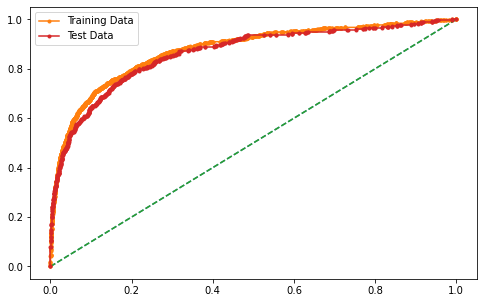

In [96]:
probs = best_grid.predict_proba(X_train)
probs1 = best_grid.predict_proba(X_test)
LDA_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

LDA_train_fpr,LDA_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(LDA_train_fpr,LDA_train_tpr, marker='.',label = 'Training Data')

LDA_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

LDA_test_fpr, LDA_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LOGISTIC REGRESSION

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [98]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'tol':[0.0001] 
    
     
}

logis = LogisticRegression() 

grid_search = GridSearchCV(estimator = logis, param_grid = param_grid, cv = 5) 

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001]})

In [100]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [101]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(penalty='l1', solver='liblinear')

0.8929205785333671
[[6359  197]
 [ 647  679]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6556
         1.0       0.78      0.51      0.62      1326

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.89      0.89      0.88      7882



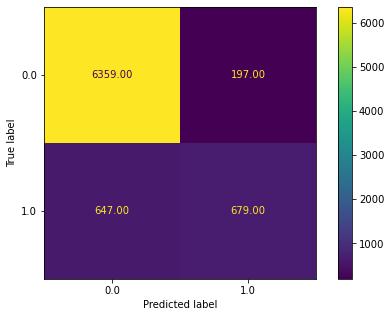

In [102]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.8872113676731794
[[2723   85]
 [ 296  274]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.76      0.48      0.59       570

    accuracy                           0.89      3378
   macro avg       0.83      0.73      0.76      3378
weighted avg       0.88      0.89      0.88      3378



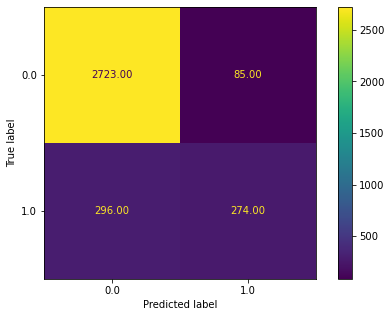

In [103]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f'); 

In [104]:
logis_train_acc = best_grid.score(X_train,y_train)
logis_train_acc

0.8929205785333671

In [105]:
logis_test_acc = best_grid.score(X_test,y_test)
logis_test_acc

0.8872113676731794

In [106]:
logis_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_train_precision=round(df1.loc["1.0"][0],2)
logis_train_recall=round(df1.loc["1.0"][1],2)
logis_train_f1=round(df1.loc["1.0"][2],2)
print ('logis_train_precision',logis_train_precision)
print ('logis_train_recall',logis_train_recall)
print ('logis_train_f1',logis_train_f1)

logis_train_precision 0.78
logis_train_recall 0.51
logis_train_f1 0.62


In [107]:
logis_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_test_precision=round(df1.loc["1.0"][0],2)
logis_test_recall=round(df1.loc["1.0"][1],2)
logis_test_f1=round(df1.loc["1.0"][2],2)
print ('logis_test_precision',logis_test_precision)
print ('logis_test_recall',logis_test_recall)
print ('logis_test_f1',logis_test_f1)

logis_test_precision 0.76
logis_test_recall 0.48
logis_test_f1 0.59


AUC for the Training Data: 0.884
AUC for the Test Data: 0.874


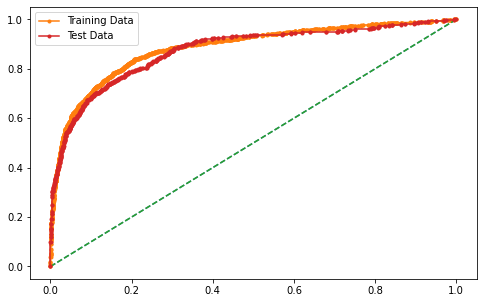

In [108]:
probs = best_grid.predict_proba(X_train)
probs1 = best_grid.predict_proba(X_test)
logis_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % logis_train_auc)

logis_train_fpr,logis_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logis_train_fpr, logis_train_tpr, marker='.',label = 'Training Data')

logis_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % logis_test_auc)

logis_test_fpr, logis_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logis_test_fpr, logis_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## CART

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter' : ["best", "random"],
    'max_depth': [5,10,20],
    'min_samples_leaf': [10,15,25], 
    'min_samples_split': [25,50,100],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)   

In [111]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 25, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=25, random_state=1)

0.9313625983252981
[[6400  156]
 [ 385  941]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6556
         1.0       0.86      0.71      0.78      1326

    accuracy                           0.93      7882
   macro avg       0.90      0.84      0.87      7882
weighted avg       0.93      0.93      0.93      7882



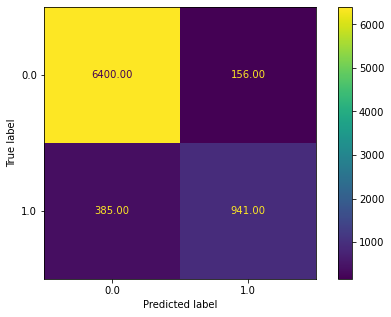

In [112]:
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.9067495559502664
[[2701  107]
 [ 208  362]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      2808
         1.0       0.77      0.64      0.70       570

    accuracy                           0.91      3378
   macro avg       0.85      0.80      0.82      3378
weighted avg       0.90      0.91      0.90      3378



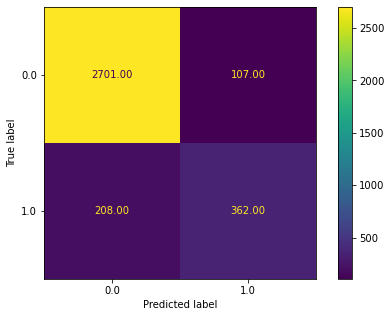

In [113]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f'); 

In [114]:
cart_train_acc = best_grid.score(X_train,y_train)
print('Cart training accuracy',cart_train_acc)
cart_test_acc = best_grid.score(X_test,y_test)
print('Cart test accuracy',cart_test_acc)

Cart training accuracy 0.9313625983252981
Cart test accuracy 0.9067495559502664


In [115]:
cart_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df1.loc["1.0"][0],2)
cart_train_recall=round(df1.loc["1.0"][1],2)
cart_train_f1=round(df1.loc["1.0"][2],2)
print ('cart_train_precision',cart_train_precision)
print ('cart_train_recall',cart_train_recall)
print ('cart_train_f1',cart_train_f1)

cart_train_precision 0.86
cart_train_recall 0.71
cart_train_f1 0.78


In [116]:
cart_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df1.loc["1.0"][0],2)
cart_test_recall=round(df1.loc["1.0"][1],2)
cart_test_f1=round(df1.loc["1.0"][2],2)
print ('cart_test_precision',cart_test_precision)
print ('cart_test_recall',cart_test_recall)
print ('cart_test_f1',cart_test_f1) 

cart_test_precision 0.77
cart_test_recall 0.64
cart_test_f1 0.7


AUC for the Training Data: 0.973
AUC for the Test Data: 0.932


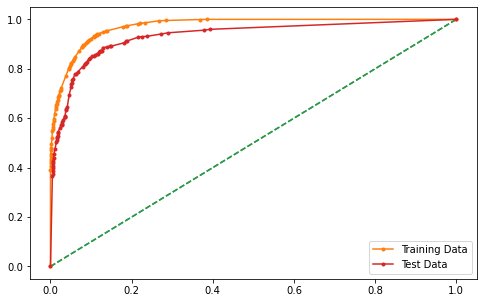

In [117]:
probs = best_grid.predict_proba(X_train)
probs1 = best_grid.predict_proba(X_test)
cart_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % cart_train_auc)

cart_train_fpr,cart_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(cart_train_fpr, cart_train_tpr, marker='.',label = 'Training Data')

cart_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % cart_test_auc)

cart_test_fpr, cart_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [118]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train_columns.columns).sort_values('Imp',ascending=False))

                                   Imp
Tenure                        0.416294
Complain_ly                   0.080626
CC_Agent_Score                0.064343
Day_Since_CC_connect          0.062803
rev_per_month                 0.051244
cashback                      0.044269
CC_Contacted_LY               0.037292
rev_growth_yoy                0.034652
Marital_Status_Single         0.028683
City_Tier                     0.027707
Payment_Credit Card           0.025745
account_segment_Super         0.025317
Account_user_count            0.024719
Marital_Status_Married        0.019985
Login_device_Mobile           0.016699
Payment_Debit Card            0.010057
coupon_used_for_payment       0.007836
Payment_E wallet              0.007717
Gender_Male                   0.005771
account_segment_Regular Plus  0.004234
Service_Score                 0.004008
Payment_UPI                   0.000000
account_segment_Regular       0.000000
account_segment_Super Plus    0.000000


## RANDOM FOREST

In [119]:
param_grid = {
    'max_depth': [5,10], 
    'max_features': [10,15],
    'min_samples_leaf': [5,15], 
    'min_samples_split': [10,15],  
    'n_estimators': [200] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [120]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200, random_state=1)

0.9635879218472468
[[6519   37]
 [ 250 1076]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      6556
         1.0       0.97      0.81      0.88      1326

    accuracy                           0.96      7882
   macro avg       0.96      0.90      0.93      7882
weighted avg       0.96      0.96      0.96      7882



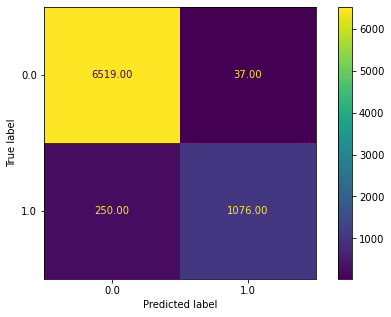

In [121]:
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.9390171699230314
[[2772   36]
 [ 170  400]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2808
         1.0       0.92      0.70      0.80       570

    accuracy                           0.94      3378
   macro avg       0.93      0.84      0.88      3378
weighted avg       0.94      0.94      0.94      3378



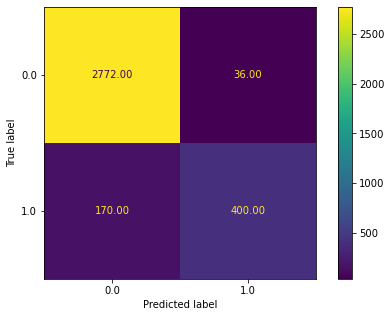

In [122]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f'); 

In [123]:
RF_train_acc = best_grid.score(X_train,y_train)
print('RF training accuracy',RF_train_acc)
RF_test_acc = best_grid.score(X_test,y_test)
print('RF test accuracy',RF_test_acc)

RF training accuracy 0.9635879218472468
RF test accuracy 0.9390171699230314


In [124]:
RF_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(RF_metrics).transpose()
RF_train_precision=round(df1.loc["1.0"][0],2)
RF_train_recall=round(df1.loc["1.0"][1],2)
RF_train_f1=round(df1.loc["1.0"][2],2)
print ('RF_train_precision',RF_train_precision)
print ('RF_train_recall',RF_train_recall)
print ('RF_train_f1',RF_train_f1)

RF_train_precision 0.97
RF_train_recall 0.81
RF_train_f1 0.88


In [125]:
RF_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(RF_metrics).transpose()
RF_test_precision=round(df1.loc["1.0"][0],2)
RF_test_recall=round(df1.loc["1.0"][1],2)
RF_test_f1=round(df1.loc["1.0"][2],2)
print ('RF_test_precision',RF_test_precision)
print ('RF_test_recall',RF_test_recall)
print ('RF_test_f1',RF_test_f1) 

RF_test_precision 0.92
RF_test_recall 0.7
RF_test_f1 0.8


AUC for the Training Data: 0.991
AUC for the Test Data: 0.967


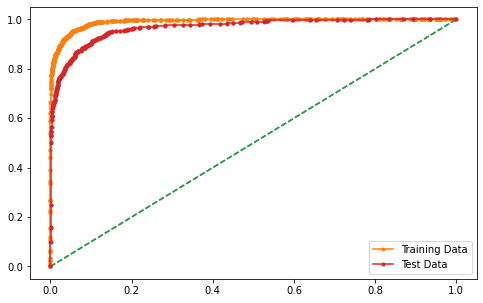

In [126]:
probs = best_grid.predict_proba(X_train)
probs1 = best_grid.predict_proba(X_test)
RF_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % RF_train_auc)

RF_train_fpr,RF_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(RF_train_fpr,RF_train_tpr, marker='.',label = 'Training Data')

RF_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % RF_test_auc)

RF_test_fpr,RF_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr,RF_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [127]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train_columns.columns).sort_values('Imp',ascending=False))

                                   Imp
Tenure                        0.369776
Complain_ly                   0.086210
Day_Since_CC_connect          0.066050
CC_Agent_Score                0.055784
rev_per_month                 0.053054
CC_Contacted_LY               0.049180
cashback                      0.048813
rev_growth_yoy                0.042285
Marital_Status_Single         0.030557
City_Tier                     0.028415
Account_user_count            0.023261
account_segment_Regular Plus  0.021528
coupon_used_for_payment       0.017286
Login_device_Mobile           0.017236
Payment_Credit Card           0.017062
account_segment_Super         0.016384
Gender_Male                   0.011782
Marital_Status_Married        0.011766
Payment_Debit Card            0.010013
Payment_E wallet              0.009099
Service_Score                 0.007374
Payment_UPI                   0.003829
account_segment_Regular       0.002001
account_segment_Super Plus    0.001254


## NEURAL NETWORK

In [128]:
param_grid = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,5000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [129]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

0.9213397614818574
[[6430  126]
 [ 494  832]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6556
         1.0       0.87      0.63      0.73      1326

    accuracy                           0.92      7882
   macro avg       0.90      0.80      0.84      7882
weighted avg       0.92      0.92      0.92      7882



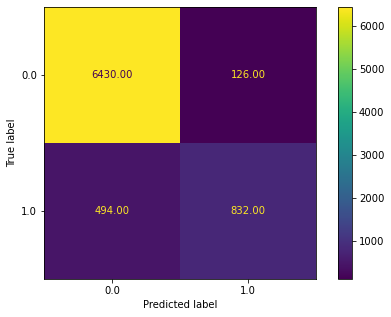

In [130]:
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.9097098875074008
[[2753   55]
 [ 250  320]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2808
         1.0       0.85      0.56      0.68       570

    accuracy                           0.91      3378
   macro avg       0.89      0.77      0.81      3378
weighted avg       0.91      0.91      0.90      3378



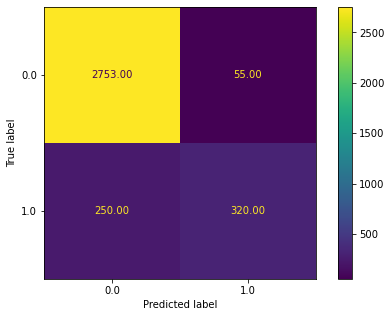

In [131]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f'); 

In [132]:
NN_train_acc = best_grid.score(X_train,y_train)
print('NN training accuracy',NN_train_acc)
NN_test_acc = best_grid.score(X_test,y_test)
print('NN test accuracy',NN_test_acc)

NN training accuracy 0.9213397614818574
NN test accuracy 0.9097098875074008


In [133]:
NN_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(NN_metrics).transpose()
NN_train_precision=round(df1.loc["1.0"][0],2)
NN_train_recall=round(df1.loc["1.0"][1],2)
NN_train_f1=round(df1.loc["1.0"][2],2)
print ('NN_train_precision',NN_train_precision)
print ('NN_train_recall',NN_train_recall)
print ('NN_train_f1',NN_train_f1)

NN_train_precision 0.87
NN_train_recall 0.63
NN_train_f1 0.73


In [134]:
NN_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(NN_metrics).transpose()
NN_test_precision=round(df1.loc["1.0"][0],2)
NN_test_recall=round(df1.loc["1.0"][1],2)
NN_test_f1=round(df1.loc["1.0"][2],2)
print ('NN_test_precision',NN_test_precision)
print ('NN_test_recall',NN_test_recall)
print ('NN_test_f1',NN_test_f1) 

NN_test_precision 0.85
NN_test_recall 0.56
NN_test_f1 0.68


AUC for the Training Data: 0.948
AUC for the Test Data: 0.926


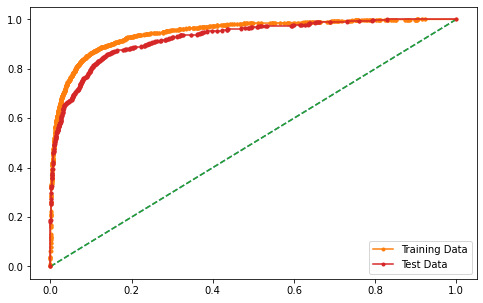

In [135]:
probs = best_grid.predict_proba(X_train)
probs1 = best_grid.predict_proba(X_test)
NN_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % NN_train_auc)

NN_train_fpr,NN_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(NN_train_fpr,NN_train_tpr, marker='.',label = 'Training Data')

NN_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % NN_test_auc)

NN_test_fpr,NN_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NN_test_fpr,NN_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## XG BOOST 

In [136]:
import xgboost as xgb
from xgboost import XGBClassifier

In [137]:
XG = XGBClassifier(learning_rate = 0.03,n_estimators=400,random_state=1)
XG = XG.fit(X_train, y_train)

[16:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.979446840903324
[[6540   16]
 [ 146 1180]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6556
         1.0       0.99      0.89      0.94      1326

    accuracy                           0.98      7882
   macro avg       0.98      0.94      0.96      7882
weighted avg       0.98      0.98      0.98      7882



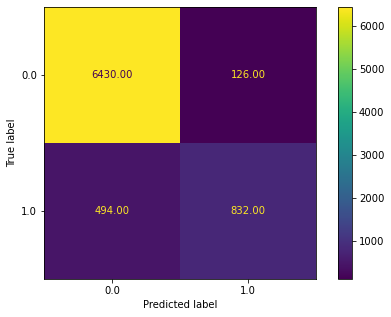

In [138]:
y_train_predict = XG.predict(X_train)
XG_model = XG.score(X_train, y_train)
print(XG_model)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_search,X_train,y_train,values_format = '.2f'); 

0.9532267613972765
[[2786   22]
 [ 136  434]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2808
         1.0       0.95      0.76      0.85       570

    accuracy                           0.95      3378
   macro avg       0.95      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378



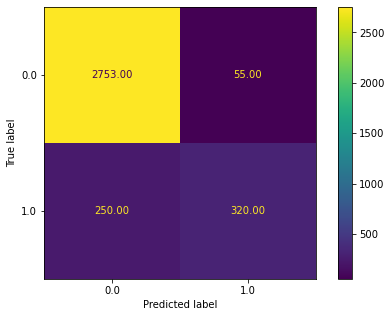

In [139]:
y_test_predict = XG.predict(X_test)
XG_model = XG.score(X_test, y_test)
print(XG_model)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_search,X_test,y_test,values_format = '.2f'); 

In [140]:
XG_train_acc = XG.score(X_train,y_train)
print('XG training accuracy',XG_train_acc)
XG_test_acc = XG.score(X_test,y_test)
print('XG test accuracy',XG_test_acc)

XG training accuracy 0.979446840903324
XG test accuracy 0.9532267613972765


In [141]:
XG_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(XG_metrics).transpose()
XG_train_precision=round(df1.loc["1.0"][0],2)
XG_train_recall=round(df1.loc["1.0"][1],2)
XG_train_f1=round(df1.loc["1.0"][2],2)
print ('XG_train_precision',XG_train_precision)
print ('XG_train_recall',XG_train_recall)
print ('XG_train_f1',XG_train_f1)

XG_train_precision 0.99
XG_train_recall 0.89
XG_train_f1 0.94


In [142]:
XG_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(XG_metrics).transpose()
XG_test_precision=round(df1.loc["1.0"][0],2)
XG_test_recall=round(df1.loc["1.0"][1],2)
XG_test_f1=round(df1.loc["1.0"][2],2)
print ('XG_test_precision',XG_test_precision)
print ('XG_test_recall',XG_test_recall)
print ('XG_test_f1',XG_test_f1) 

XG_test_precision 0.95
XG_test_recall 0.76
XG_test_f1 0.85


AUC for the Training Data: 0.997
AUC for the Test Data: 0.978


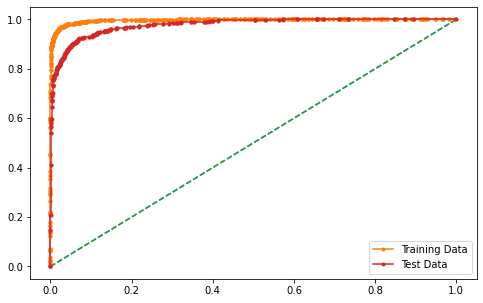

In [143]:
probs = XG.predict_proba(X_train)
probs1 = XG.predict_proba(X_test)
XG_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % XG_train_auc)

XG_train_fpr,XG_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(XG_train_fpr,XG_train_tpr, marker='.',label = 'Training Data')

XG_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % XG_test_auc)

XG_test_fpr,XG_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XG_test_fpr,XG_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [144]:
print (pd.DataFrame(XG .feature_importances_, columns = ["Imp"], index = X_train_columns.columns).sort_values('Imp',ascending=False))

                                   Imp
Tenure                        0.144016
Complain_ly                   0.115444
account_segment_Super         0.049672
Payment_E wallet              0.046801
CC_Agent_Score                0.046485
account_segment_Regular Plus  0.044313
City_Tier                     0.043638
Payment_Credit Card           0.040139
account_segment_Regular       0.040029
rev_per_month                 0.039422
Login_device_Mobile           0.038743
Marital_Status_Single         0.038321
Day_Since_CC_connect          0.038192
Marital_Status_Married        0.033889
Account_user_count            0.029211
Payment_UPI                   0.029061
Gender_Male                   0.026591
Payment_Debit Card            0.025880
coupon_used_for_payment       0.025678
CC_Contacted_LY               0.024018
rev_growth_yoy                0.023631
cashback                      0.023397
Service_Score                 0.017740
account_segment_Super Plus    0.015689


## Gradient Boosting

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [146]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9067495559502664
[[6390  166]
 [ 569  757]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      6556
         1.0       0.82      0.57      0.67      1326

    accuracy                           0.91      7882
   macro avg       0.87      0.77      0.81      7882
weighted avg       0.90      0.91      0.90      7882



In [147]:
y_test_predict = gbcl.predict(X_test)
model_score  = gbcl.score(X_test, y_test)
print(model_score )
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9055654233274126
[[2734   74]
 [ 245  325]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2808
         1.0       0.81      0.57      0.67       570

    accuracy                           0.91      3378
   macro avg       0.87      0.77      0.81      3378
weighted avg       0.90      0.91      0.90      3378



In [148]:
GB_train_acc = gbcl.score(X_train,y_train)
print('GB training accuracy',GB_train_acc)
GB_test_acc = gbcl.score(X_test,y_test)
print('GB test accuracy',GB_test_acc)

GB training accuracy 0.9067495559502664
GB test accuracy 0.9055654233274126


In [149]:
GB_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(GB_metrics).transpose()
GB_train_precision=round(df1.loc["1.0"][0],2)
GB_train_recall=round(df1.loc["1.0"][1],2)
GB_train_f1=round(df1.loc["1.0"][2],2)
print ('GB_train_precision',GB_train_precision)
print ('GB_train_recall',GB_train_recall)
print ('GB_train_f1',GB_train_f1)

GB_train_precision 0.82
GB_train_recall 0.57
GB_train_f1 0.67


In [150]:
GB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(GB_metrics).transpose()
GB_test_precision=round(df1.loc["1.0"][0],2)
GB_test_recall=round(df1.loc["1.0"][1],2)
GB_test_f1=round(df1.loc["1.0"][2],2)
print ('GB_test_precision',GB_test_precision)
print ('GB_test_recall',GB_test_recall)
print ('GB_test_f1',GB_test_f1) 

GB_test_precision 0.81
GB_test_recall 0.57
GB_test_f1 0.67


## Bagging

In [151]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=XG,n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [152]:
y_train_predict = bgcl.predict(X_train)
model_score = bgcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9748794722151738
[[6536   20]
 [ 178 1148]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      6556
         1.0       0.98      0.87      0.92      1326

    accuracy                           0.97      7882
   macro avg       0.98      0.93      0.95      7882
weighted avg       0.98      0.97      0.97      7882



In [153]:
y_test_predict = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.948194197750148
[[2787   21]
 [ 154  416]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2808
         1.0       0.95      0.73      0.83       570

    accuracy                           0.95      3378
   macro avg       0.95      0.86      0.90      3378
weighted avg       0.95      0.95      0.95      3378



In [154]:
BAG_train_acc = bgcl.score(X_train,y_train)
print('GB training accuracy',BAG_train_acc)
BAG_test_acc = bgcl.score(X_test,y_test)
print('GB test accuracy',BAG_test_acc)

GB training accuracy 0.9748794722151738
GB test accuracy 0.948194197750148


In [155]:
BAG_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(BAG_metrics).transpose()
BAG_train_precision=round(df1.loc["1.0"][0],2)
BAG_train_recall=round(df1.loc["1.0"][1],2)
BAG_train_f1=round(df1.loc["1.0"][2],2)
print ('BAG_train_precision',BAG_train_precision)
print ('BAG_train_recall',BAG_train_recall)
print ('BAG_train_f1',BAG_train_f1)

BAG_train_precision 0.98
BAG_train_recall 0.87
BAG_train_f1 0.92


In [156]:
BAG_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(BAG_metrics).transpose()
BAG_test_precision=round(df1.loc["1.0"][0],2)
BAG_test_recall=round(df1.loc["1.0"][1],2)
BAG_test_f1=round(df1.loc["1.0"][2],2)
print ('BAG_test_precision',BAG_test_precision)
print ('BAG_test_recall',BAG_test_recall)
print ('BAG_test_f1',BAG_test_f1) 

BAG_test_precision 0.95
BAG_test_recall 0.73
BAG_test_f1 0.83


## NAIVE BASED

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [159]:
ytrain_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))          
print(metrics.classification_report(y_train, ytrain_predict))

0.7806394316163411
[[5201 1355]
 [ 374  952]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      6556
         1.0       0.41      0.72      0.52      1326

    accuracy                           0.78      7882
   macro avg       0.67      0.76      0.69      7882
weighted avg       0.85      0.78      0.80      7882



In [160]:
ytest_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))         
print(metrics.classification_report(y_test, ytest_predict))

0.7732386027235051
[[2219  589]
 [ 177  393]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      2808
         1.0       0.40      0.69      0.51       570

    accuracy                           0.77      3378
   macro avg       0.66      0.74      0.68      3378
weighted avg       0.84      0.77      0.79      3378



## KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree') 
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [162]:
ytrain_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.9843948236488201
[[6519   37]
 [  86 1240]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6556
         1.0       0.97      0.94      0.95      1326

    accuracy                           0.98      7882
   macro avg       0.98      0.96      0.97      7882
weighted avg       0.98      0.98      0.98      7882



In [163]:
ytest_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.9715808170515098
[[2781   27]
 [  69  501]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2808
         1.0       0.95      0.88      0.91       570

    accuracy                           0.97      3378
   macro avg       0.96      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



In [164]:
KNN_train_acc = KNN_model.score(X_train,y_train)
print('KNN training accuracy',KNN_train_acc)
KNN_test_acc = KNN_model.score(X_test,y_test)
print('KNN test accuracy',KNN_test_acc)

KNN training accuracy 0.9843948236488201
KNN test accuracy 0.9715808170515098


In [165]:
KNN_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df1.loc["1.0"][0],2)
KNN_train_recall=round(df1.loc["1.0"][1],2)
KNN_train_f1=round(df1.loc["1.0"][2],2)
print ('KNN_train_precision',KNN_train_precision)
print ('KNN_train_recall',KNN_train_recall)
print ('KNN_train_f1',KNN_train_f1)

KNN_train_precision 0.98
KNN_train_recall 0.87
KNN_train_f1 0.92


In [166]:
KNN_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df1.loc["1.0"][0],2)
KNN_test_recall=round(df1.loc["1.0"][1],2)
KNN_test_f1=round(df1.loc["1.0"][2],2)
print ('KNN_test_precision',KNN_test_precision)
print ('KNN_test_recall',KNN_test_recall)
print ('KNN_test_f1',KNN_test_f1) 

KNN_test_precision 0.95
KNN_test_recall 0.73
KNN_test_f1 0.83


## ADA BOOST

In [167]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [168]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8995178888606953
[[6295  261]
 [ 531  795]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      6556
         1.0       0.75      0.60      0.67      1326

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882



In [169]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8975725281231498
[[2696  112]
 [ 234  336]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2808
         1.0       0.75      0.59      0.66       570

    accuracy                           0.90      3378
   macro avg       0.84      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378



In [170]:
ADA_train_acc = ADB_model.score(X_train,y_train)
print('ADA training accuracy',ADA_train_acc)
ADA_test_acc = ADB_model.score(X_test,y_test)
print('GB test accuracy',ADA_test_acc)

ADA training accuracy 0.8995178888606953
GB test accuracy 0.8975725281231498


In [171]:
ADA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df1=pd.DataFrame(ADA_metrics).transpose()
ADA_train_precision=round(df1.loc["1.0"][0],2)
ADA_train_recall=round(df1.loc["1.0"][1],2)
ADA_train_f1=round(df1.loc["1.0"][2],2)
print ('ADA_train_precision',ADA_train_precision)
print ('ADA_train_recall',ADA_train_recall)
print ('ADA_train_f1',ADA_train_f1)

ADA_train_precision 0.75
ADA_train_recall 0.6
ADA_train_f1 0.67


In [172]:
ADA_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df1=pd.DataFrame(ADA_metrics).transpose()
ADA_test_precision=round(df1.loc["1.0"][0],2)
ADA_test_recall=round(df1.loc["1.0"][1],2)
ADA_test_f1=round(df1.loc["1.0"][2],2)
print ('ADA_test_precision',ADA_test_precision)
print ('ADA_test_recall',ADA_test_recall)
print ('ADA_test_f1',ADA_test_f1) 

ADA_test_precision 0.75
ADA_test_recall 0.59
ADA_test_f1 0.66


In [173]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'RF Train':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
        'RF Test':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
        'logis Train':[logis_train_acc,logis_train_auc,logis_train_recall,logis_train_precision,logis_train_f1],
        'logis Test':[logis_test_acc,logis_test_auc,logis_test_recall,logis_test_precision,logis_test_f1],
        'cart Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'cart Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'NN Train':[NN_train_acc,NN_train_auc,NN_train_recall,NN_train_precision,NN_train_f1],
        'NN Test':[NN_test_acc,NN_test_auc,NN_test_recall,NN_test_precision,NN_test_f1],
        'XG Train':[XG_train_acc,XG_train_auc,XG_train_recall,XG_train_precision,XG_train_f1],
        'XG Test':[XG_test_acc,XG_test_auc,XG_test_recall,XG_test_precision,XG_test_f1]},index=index) 
       
round(data,2)
   

,LDA Train,LDA Test,RF Train,RF Test,logis Train,logis Test,cart Train,cart Test,NN Train,NN Test,XG Train,XG Test
Accuracy,0.89,0.88,0.96,0.94,0.89,0.89,0.93,0.91,0.92,0.91,0.98,0.95
AUC,0.88,0.86,0.99,0.97,0.88,0.87,0.97,0.93,0.95,0.93,1.00,0.98
Recall,0.47,0.45,0.81,0.70,0.51,0.48,0.71,0.64,0.63,0.56,0.89,0.76
Precision,0.76,0.75,0.97,0.92,0.78,0.76,0.86,0.77,0.87,0.85,0.99,0.95
F1 Score,0.58,0.56,0.88,0.80,0.62,0.59,0.78,0.70,0.73,0.68,0.94,0.85


In [174]:
index=['Accuracy','Recall','Precision','F1 Score']
data1 = pd.DataFrame({'GB Train':[GB_train_acc,GB_train_recall,GB_train_precision,GB_train_f1],
                    'GB Test':[GB_test_acc,GB_test_recall,GB_test_precision,GB_test_f1],
                    'BAG Train':[BAG_train_acc,BAG_train_recall,BAG_train_precision,BAG_train_f1],
                    'BAG Test':[BAG_test_acc,BAG_test_recall,BAG_test_precision,BAG_test_f1],
                    'KNN Train':[KNN_train_acc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
                    'KNN Test':[KNN_test_acc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                    'ADA Train':[ADA_train_acc,ADA_train_recall,ADA_train_precision,ADA_train_f1],
                    'ADA Test':[ADA_test_acc,ADA_test_recall,ADA_test_precision,ADA_test_f1],
                     },index=index) 
round(data1,2)

,GB Train,GB Test,BAG Train,BAG Test,KNN Train,KNN Test,ADA Train,ADA Test
Accuracy,0.91,0.91,0.97,0.95,0.98,0.97,0.90,0.90
Recall,0.57,0.57,0.87,0.73,0.87,0.73,0.60,0.59
Precision,0.82,0.81,0.98,0.95,0.98,0.95,0.75,0.75
F1 Score,0.67,0.67,0.92,0.83,0.92,0.83,0.67,0.66
